In [ ]:
import sys
import matplotlib.pyplot as plt

import nltk
import numpy
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from tokenFun import getFile, clear_board

numpy.set_printoptions(threshold=sys.maxsize)

listOfBooks = {
    'dziady-dziady-widowisko-czesc-i': 'https://wolnelektury.pl/media/book/txt/dziady-dziady-widowisko-czesc-i.txt'
    , 'pan-tadeusz': 'https://wolnelektury.pl/media/book/txt/pan-tadeusz.txt'
    # , 'konrad-wallenrod': 'https://wolnelektury.pl/media/book/txt/konrad-wallenrod.txt'
    # , 'reduta-ordona': 'https://wolnelektury.pl/media/book/txt/reduta-ordona.txt'
    # , 'oda-do-mlodosci': 'https://wolnelektury.pl/media/book/txt/oda-do-mlodosci.txt'
    # , 'krzyzacy-tom-pierwszy': 'https://wolnelektury.pl/media/book/txt/krzyzacy-tom-pierwszy.txt'
    # , 'krzyzacy-tom-drugi': 'https://wolnelektury.pl/media/book/txt/krzyzacy-tom-drugi.txt'
    # , 'potop-tom-pierwszy': 'https://wolnelektury.pl/media/book/txt/potop-tom-pierwszy.txt'
    # , 'potop-tom-drugi': 'https://wolnelektury.pl/media/book/txt/potop-tom-drugi.txt'
    # , 'potop-tom-trzeci': 'https://wolnelektury.pl/media/book/txt/potop-tom-trzeci.txt'
    # , 'quo-vadis': 'https://wolnelektury.pl/media/book/txt/quo-vadis.txt'
    # , 'pan-wolodyjowski': 'https://wolnelektury.pl/media/book/txt/pan-wolodyjowski.txt'
    # , 'ogniem-i-mieczem-tom-pierwszy': 'https://wolnelektury.pl/media/book/txt/ogniem-i-mieczem-tom-pierwszy.txt'
    #                                    ,'ogniem-i-mieczem-tom-drugi': 'https://wolnelektury.pl/media/book/txt/ogniem-i-mieczem-tom-drugi.txt'
}

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

In [ ]:
corpus = []
labels = []
for target in listOfBooks:
    labels.append(target)
    print("Pobranie ksiazki: " + target)
    book = getFile(listOfBooks[target]);
    corpus.append(book)

In [ ]:
vectorizer = CountVectorizer(stop_words=stopwords.words('polish'), token_pattern=r'\b[^\d\W]+\b', ngram_range=(1, 2))

corpusCount = vectorizer.fit_transform(corpus)
counts = pd.DataFrame(corpusCount.toarray(),
                      columns=vectorizer.get_feature_names())
cos1 = cosine_similarity(corpusCount)
clear_board(np.matrix(cos1), labels)

In [ ]:
tfidfVectorizer = TfidfVectorizer(use_idf=True)
x = tfidfVectorizer.fit_transform(corpus)
print(x)
print(type(x))

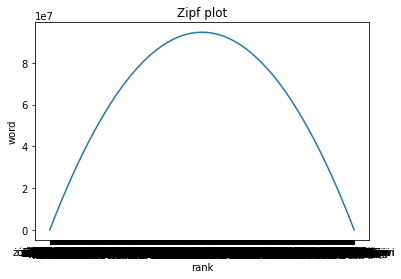

{'żłobem': 19457, 'żęciem': 38912, 'żądło': 58365, 'żądłem': 77816, 'żądzą': 97265, 'żądał': 116712, 'żądać': 136157, 'żądam': 155600, 'żądali': 175041, 'żądają': 194480, 'żółw': 213917, 'żółtą': 233352, 'żółty': 252785, 'żółto': 272216, 'żółtej': 291645, 'żółte': 311072, 'żółtawym': 330497, 'żółtawo': 349920, 'żółta': 369341, 'żółknie': 388760, 'żółcią': 408177, 'żyły': 427592, 'żyło': 447005, 'żyłeś': 466416, 'żyłem': 485825, 'żyłam': 505232, 'żyłach': 524637, 'żył': 544040, 'żyć': 563441, 'żyznej': 582840, 'żyzna': 602237, 'żywą': 621632, 'żywych': 641025, 'żywy': 660416, 'żywszych': 679805, 'żywszego': 699192, 'żywość': 718577, 'żywością': 737960, 'żywotów': 757341, 'żywotne': 776720, 'żywota': 796097, 'żywot': 815472, 'żywo': 834845, 'żywne': 854216, 'żywił': 873585, 'żywią': 892952, 'żywioły': 912317, 'żywi': 931680, 'żywe': 951041, 'żywcem': 970400, 'żywca': 989757, 'żywa': 1009112, 'żyto': 1028465, 'żytem': 1047816, 'żyta': 1067165, 'żyli': 1086512, 'żyję': 1105857, 'żyjący': 1

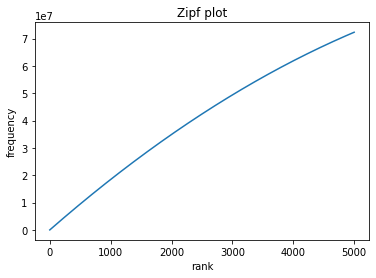

In [10]:
sortDctForZip = dict(sorted(tfidfVectorizer.vocabulary_.items(), key=lambda item: item[1], reverse=True))
zipDct = {}
fs = []
rang = 1
for dct in sortDctForZip:
    zipDct.update({dct: sortDctForZip.get(dct) * rang})
    fs.append(sortDctForZip.get(dct) * rang)
    rang = rang + 1
print(zipDct)
plt.clf()
plt.title('Zipf plot')
plt.xlabel('rank')
plt.ylabel('frequency')
plt.plot(range(0, len(fs[:5000])), fs[:5000])
plt.show()